# Toxic Comment Classification Challenge 

A corpus of manually labeled comments - classifying each comment by its degree of toxicity is available on Kaggle. 

In [1]:
import numpy as np
import pandas as pd

### Acquire the data

In [3]:
! wget http://bit.do/deep_toxic_train -P data/

/bin/sh: wget: command not found


In [ ]:
!mv data/deep_toxic_train data/train.zip

In [ ]:
!cd data && unzip train.zip

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Import the required libraries

In [4]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Create the train and label datasets (X, y)

In [7]:
y = train.iloc[:,2:].values

In [8]:
train_sentences = train["comment_text"]

In [9]:
train_sentences.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

### Pre-processing the train data

- **Tokenization**
"I am going to school" -> ["I", "am", "going", "to", "school"]

- **Indexing**
{1:"I", 2:"am", 3:"going", 4:"to", 5:"school" }

- **Index Representation**
[1, 2, 3, 4, 5]

In [10]:
max_features = 2000

**Tokenize**

In [11]:
tokenizer = Tokenizer(num_words=max_features)

In [12]:
tokenizer.fit_on_texts(list(train_sentences))

**Index representation**

In [13]:
tokenized_train = tokenizer.texts_to_sequences(train_sentences)

**Finding count of occurences of a word**

In [14]:
tokenizer.word_counts["hey"]

3183

**Finding index of a word**

In [15]:
tokenizer.word_index["hey"]

412

**Index representation of a sentence**

In [16]:
# First sentence
train["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [17]:
# index representation
tokenized_train[0]

[688,
 75,
 1,
 126,
 130,
 177,
 29,
 672,
 1116,
 86,
 331,
 51,
 50,
 15,
 60,
 148,
 7,
 34,
 117,
 1221,
 4,
 45,
 59,
 244,
 1,
 365,
 31,
 1,
 38,
 27,
 143,
 73,
 89,
 985]

In [18]:
# Find index of the first word: explanation
tokenizer.word_index["explanation"]

688

**padding**
How to handle variable length sentences?

In [19]:
maxlen = 200

In [20]:
X_train = pad_sequences(tokenized_train, maxlen = maxlen)

In [21]:
X_train.shape

(159571, 200)

**How did we select 200?**

find length of each sentence and plot the length

In [22]:
number_of_words = [len(comment) for comment in tokenized_train]

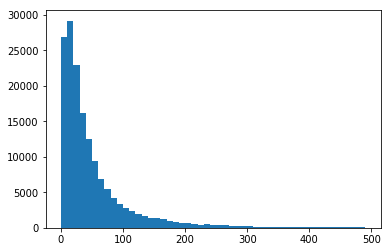

In [23]:
plt.hist(number_of_words, bins = np.arange(0, 500, 10))
plt.show()

### Model

**Model 1**

In [24]:
model = Sequential()

In [28]:
embedding_size = 128

In [29]:
model.add(Embedding(max_features, output_dim=embedding_size))

In [30]:
model.add(LSTM(60))

In [31]:
model.add(Dropout(0.1))

In [32]:
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y, batch_size=16, epochs=2, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
 56592/143613 [==========>...................] - ETA: 41:05 - loss: 0.0754 - acc: 0.9762

**Model 2**

Using keras functional API 

In [ ]:
# Input layer

In [ ]:
inp = Input(shape=(maxlen, )) 

In [ ]:
# Embedding layer. We will create embedding as part of the learning process

In [ ]:
embedding_size = 128

In [ ]:
x = Embedding(max_features, embedding_size)(inp)

In [ ]:
x = LSTM(60, return_sequences=True, name = "lstm_layer")(x)

In [ ]:
x = GlobalMaxPool1D()(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(50, activation = "relu")(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs = inp, outputs = x)

In [ ]:
model.compile(loss = "binary_crossentropy",
             optimizer = "adam", 
             metrics = ["accuracy"])

In [ ]:
batch_size = 32

In [ ]:
epochs = 2

In [ ]:
model.fit(X_train, y, batch_size=batch_size, epochs = epochs, validation_split = 0.1)

In [ ]:
model.summary()

# Generating text

In [ ]:
!wget http://bit.do/pydeeptexthelper

In [ ]:
!mv pydeeptexthelper text_helper.py

In [ ]:
from text_helper import *

In [ ]:
from keras.layers import TimeDistributed

In [ ]:
data = train[train["threat"]==1]["comment_text"]

In [ ]:
data.head()

In [ ]:
chars = list(set(data))

In [ ]:
VOCAB_SIZE = len(chars)

In [ ]:
VOCAB_SIZE

In [ ]:
ix_to_char = {ix:char for ix, char in enumerate(chars)}
char_to_ix = {char:ix for ix, char in enumerate(chars)}

In [ ]:
SEQ_LENGTH = 50

To use Keras, the input for the network should be of the form:
(number_of_sequences, length_of_sequence, number_of_features)

length_of_sequence -> SEQ_LENGTH defined above (50). 
number_of_features -> the length of the char array above (478)
number_of_sequences -> length of data / length of each sequence

In [ ]:
X = np.zeros((int(len(data)/SEQ_LENGTH), SEQ_LENGTH, VOCAB_SIZE))

y = np.zeros((int(len(data)/SEQ_LENGTH), SEQ_LENGTH, VOCAB_SIZE))
for i in range(0, int(len(data)/SEQ_LENGTH)):
    X_sequence = data[i*SEQ_LENGTH:(i+1)*SEQ_LENGTH]
    X_sequence_ix = [char_to_ix[value] for value in X_sequence]
    input_sequence = np.zeros((SEQ_LENGTH, VOCAB_SIZE))
    for j in range(SEQ_LENGTH):
        input_sequence[j][X_sequence_ix[j]] = 1.
    X[i] = input_sequence

    y_sequence = data[i*SEQ_LENGTH+1:(i+1)*SEQ_LENGTH+1]
    y_sequence_ix = [char_to_ix[value] for value in y_sequence]
    target_sequence = np.zeros((SEQ_LENGTH, VOCAB_SIZE))
    for j in range(SEQ_LENGTH):
        target_sequence[j][y_sequence_ix[j]] = 1.
    y[i] = target_sequence

In [ ]:
X.shape

In [ ]:
HIDDEN_DIM=20

In [ ]:
model = Sequential()
model.add(LSTM(HIDDEN_DIM, input_shape=(None, VOCAB_SIZE), return_sequences=True))
for i in range(LAYER_NUM - 1):
    model.add(LSTM(HIDDEN_DIM, return_sequences=True))
model.add(TimeDistributed(Dense(VOCAB_SIZE)))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

In [ ]:
BATCH_SIZE = 128

In [ ]:
GENERATE_LENGTH = 40

In [ ]:
def generate_text(model, length):
    ix = [np.random.randint(VOCAB_SIZE)]
    y_char = [ix_to_char[ix[-1]]]
    X = np.zeros((1, length, VOCAB_SIZE))
    for i in range(length):
        X[0, i, :][ix[-1]] = 1
        print(ix_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(ix_to_char[ix[-1]])
    return ('').join(y_char)

In [ ]:
nb_epoch = 0
while nb_epoch < 10:
    print('\n\n')
    model.fit(X, y, batch_size=BATCH_SIZE, verbose=1, nb_epoch=1)
    nb_epoch += 1
    generate_text(model, GENERATE_LENGTH)
    if nb_epoch % 10 == 0:
        model.save_weights('checkpoint_{}_epoch_{}.hdf5'.format(HIDDEN_DIM, nb_epoch))